<a href="https://colab.research.google.com/github/nicolassalomon96/procesamiento_imagenes_UNS/blob/main/TP1/Imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Métodos para abrir y mostrar una imagen

In [12]:
#Importamos las librerias necesarias para resolver el TP
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio

In [2]:
#Montamos nuestro Google Drive para tener acceso a las imágenes a leer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Leer imagen con imageio y mostrarla con matplotlib

El elemento es de tipo <class 'imageio.core.util.Array'> (es una matriz)
Tamaño de la imagen:(540, 810, 3) (Dado que es una imagen RGB tenemos 3 canales de 540x810 , uno para cada color)



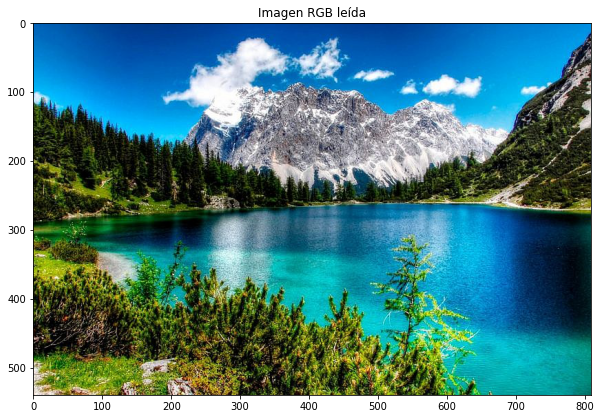

In [37]:
path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP1/paisaje.jpg' #Path en Drive donde se encuentra la imagen
image = imageio.imread(path) #Leemos la imagen
print(f"El elemento es de tipo {type(image)} (es una matriz)")
print(f"Tamaño de la imagen:{image.shape} (Dado que es una imagen RGB tenemos 3 canales de {image.shape[0]}x{image.shape[1]} , uno para cada color)\n")

#Mostramos la imagen empleando la librería matplotlib
fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(image)
axs.set_title("Imagen RGB leída")
plt.show() 

## 1.2 Leer la imagen con matplotlib.image y mostrarla con matplotlib.plyplot

El elemento es de tipo <class 'numpy.ndarray'> (es una matriz de tipo numpy de varias dimensiones (3 en este caso))
Tamaño de la imagen:(540, 810, 3) (Dado que es una imagen RGB tenemos 3 canales de 540x810 , uno para cada color)



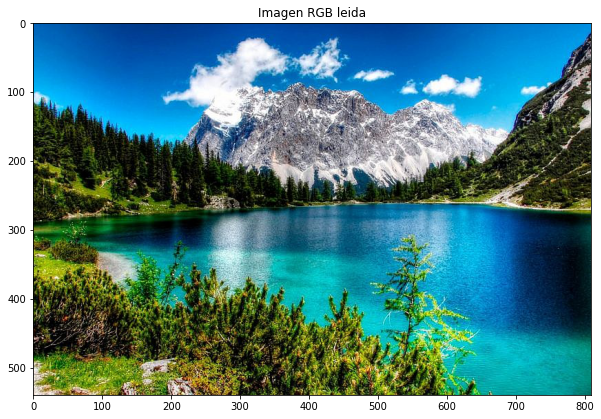

In [38]:
path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP1/paisaje.jpg' #Path en Drive donde se encuentra la imagen
image = mpimg.imread(path) #Leemos la imagen
print(f"El elemento es de tipo {type(image)} (es una matriz de tipo numpy de varias dimensiones (3 en este caso))")
print(f"Tamaño de la imagen:{image.shape} (Dado que es una imagen RGB tenemos 3 canales de {image.shape[0]}x{image.shape[1]} , uno para cada color)\n")

#Mostramos la imagen empleando la librería matplotlib
fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(image)
axs.set_title("Imagen RGB leida")
plt.show() 

# 2. Métodos para guardar las imágenes

In [39]:
path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP1/' #Path en Drive donde se guardará la imagen
name = 'paisaje_mod' #nombre con que se guardará la imágen
format = '.png' #formato con que se guardará la imagen
full_path = (os.path.join(path,name+format))

## 2.1 Empleando imageio

In [26]:
image_saved = imageio.imsave(full_path,image)
print("La imagen se guardó exitosamente")

La imagen se guardó exitosamente


## 2.2 Empleando matplotlib.image

In [24]:
image_saved = mpimg.imsave(full_path,image)
print("La imagen se guardó exitosamente")

La imagen se guardó exitosamente


# 3. Modificar la imagen y mostrar el resultado

## 3.1 Separar canales R, G y B

<class 'numpy.uint8'>


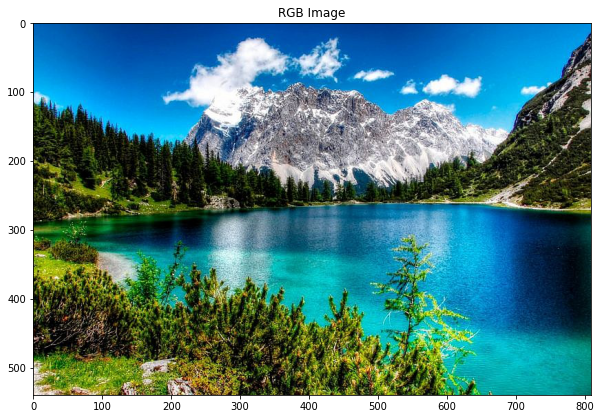

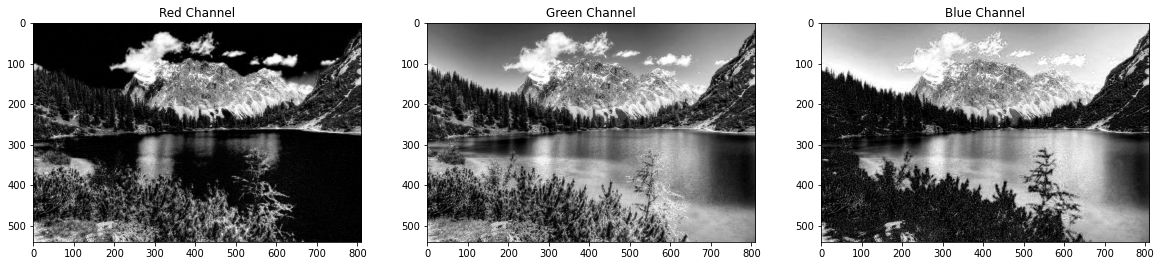

In [69]:
def split_RGB(image):
  '''input=arreglo numpy obtenido luego de leer la imagen
     output = 3 canales separados (R, G, B)  
  '''
  R = image[:,:,0]
  G = image[:,:,1]
  B = image[:,:,2]
  return R,G,B

R,G,B = split_RGB(image)

#Imagen original para comparar con cada canal.
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.set_title("RGB Image")

#Mostramos por pantalla cada uno de los canales de forma independiente
fig, axs = plt.subplots(1, 3, figsize=(20,20))

plt.subplot(1,3,1)
plt.imshow(R, cmap='gray')
plt.title("Red Channel")

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(B, cmap='gray')
plt.title("Blue Channel")

plt.show()

Observamos como aquellas zonas de la imagen que poseen un mayor componente de cada canal (rojo, verde o azul) se ven mas blancas, dado que el valor del pixel en dicha zona estará más cercano a 255, mientras que aquellas zonas que carecen del color correspondiente a cada canal se ven mas oscuras, dado que el pixel tendrá un valor mas cercano a 0. Todo esto empleando un mapa de color de escalas de grises para representar la matriz 2D perteneciente a cada canal.

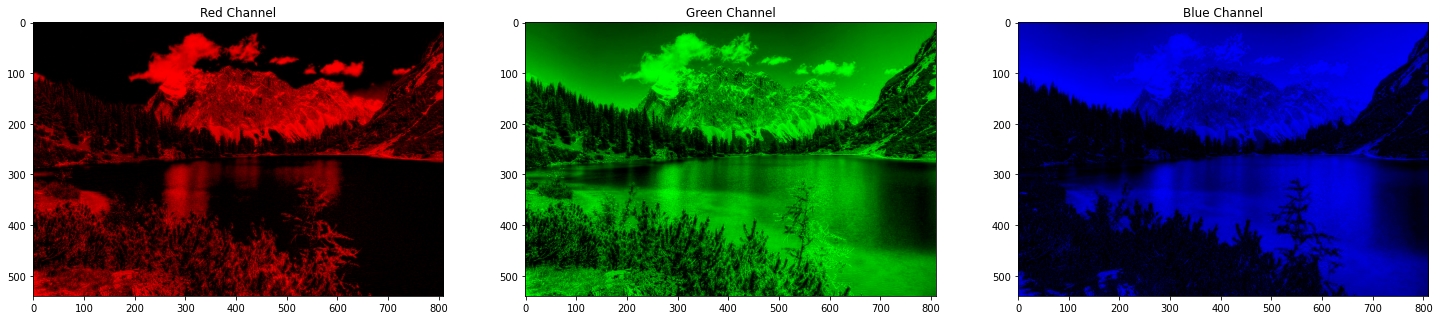

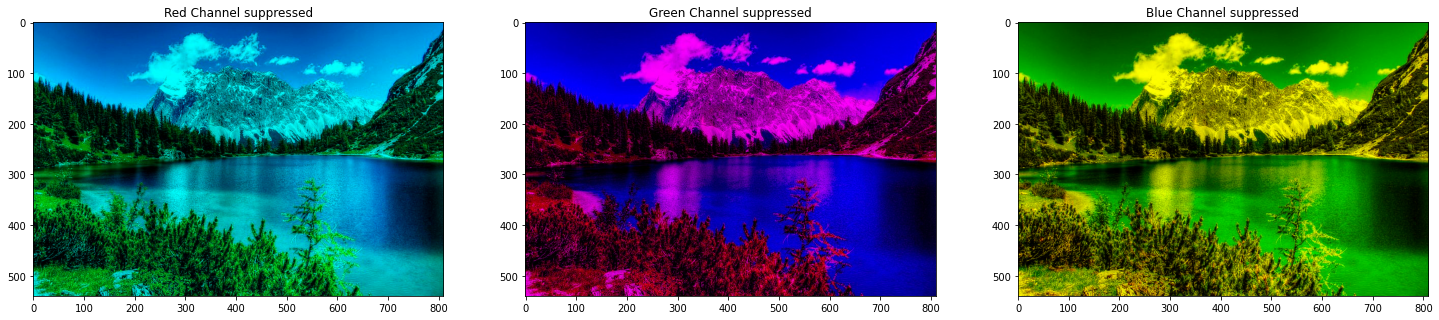

In [110]:
# A continuación veremos la imagen alterando uno o dos canales

#Elimino las componentes verde y azul de la imagen
image_red = np.dstack((R,np.zeros(G.shape,dtype=int),np.zeros(B.shape,dtype=int)))

#Elimino las componentes rojo y azul de la imagen
image_green = np.dstack((np.zeros(R.shape,dtype=int),G,np.zeros(B.shape,dtype=int)))

#Elimino las componentes rojo y verde de la imagen
image_blue = np.dstack((np.zeros(R.shape,dtype=int),np.zeros(G.shape,dtype=int),B))

#Elimino solo la componentes rojo de la imagen
image_green_blue = np.dstack((np.zeros(R.shape,dtype=int),G,B))

#Elimino las componentes verde de la imagen
image_red_blue = np.dstack((R,np.zeros(G.shape,dtype=int),B))

#Elimino las componentes azul de la imagen
image_red_green = np.dstack((R,G,np.zeros(B.shape,dtype=int)))

fig, axs = plt.subplots(1, 3, figsize=(25,25))

plt.subplot(1,3,1)
plt.imshow(image_red)
plt.title("Red Channel")

plt.subplot(1,3,2)
plt.imshow(image_green)
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(image_blue)
plt.title("Blue Channel")

fig1, axs1 = plt.subplots(1, 3, figsize=(25,25))

plt.subplot(1,3,1)
plt.imshow(image_green_blue)
plt.title("Red Channel suppressed")

plt.subplot(1,3,2)
plt.imshow(image_red_blue)
plt.title("Green Channel suppressed")

plt.subplot(1,3,3)
plt.imshow(image_red_green)
plt.title("Blue Channel suppressed")

plt.show()

Se observa como al eliminar 2 de los 3 canales de la imagen, podemos determinar la mayor presencia de verde y azul en la misma. De hecho, esto se confirma al eliminar el canal rojo solamente (imagen de abajo a la izquierda), ya que vemos como la imagen no se modifica significativamente, como si lo hace al momento de eliminar alguno de los otros canales (imagenes central y derecha de abajo).

## 3.2. Convertir de RGB a escala de grises


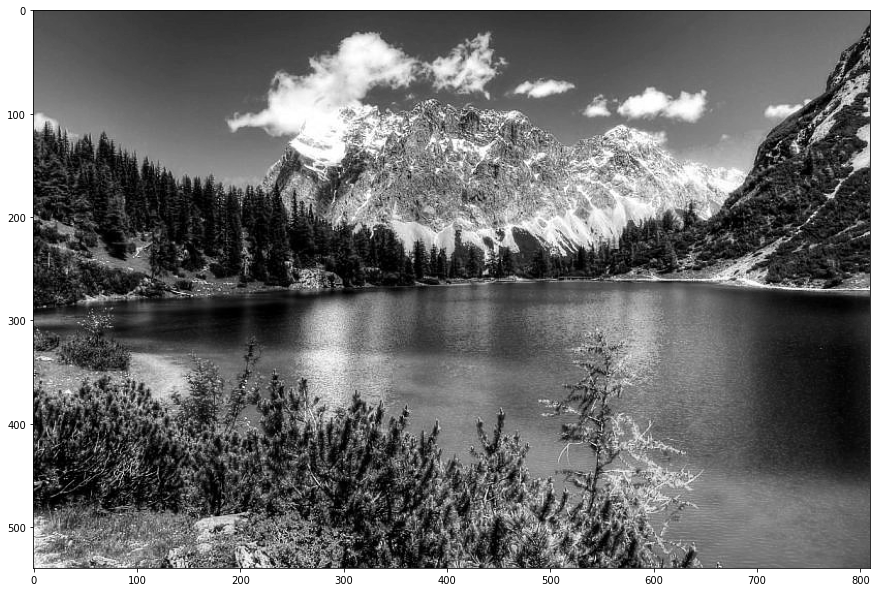

In [114]:
def rgb2gray (image):
  R, G, B = split_RGB(image) #Separamos los canales R, G y B con la función definida anteriormente
  imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
  return imgGray

image_gray = rgb2gray(image)

fig, axs = plt.subplots(figsize=(15,15))
plt.imshow(image_gray, cmap='gray') #Mostramos la imagen empleando el mapa de color de escalas de grises
plt.show()

## 3.3. Volteamos la imagen


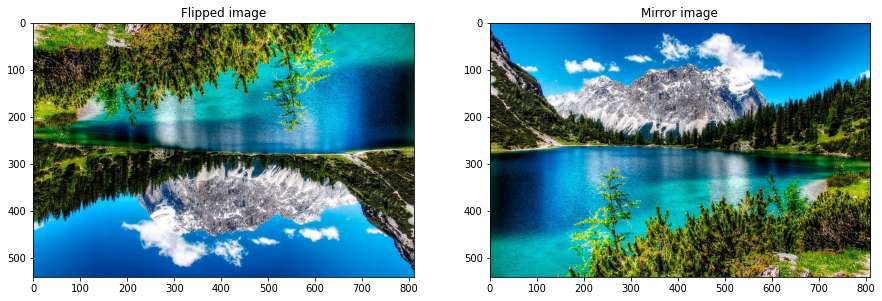

In [123]:
flip_image = np.flipud(image)
mirror_image = np.fliplr(image)

fig, axs = plt.subplots(1,2, figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(flip_image)
plt.title('Flipped image')

plt.subplot(1,2,2)
plt.imshow(mirror_image)
plt.title('Mirror image')

plt.show()

## 3.4. Recortamos la imagen

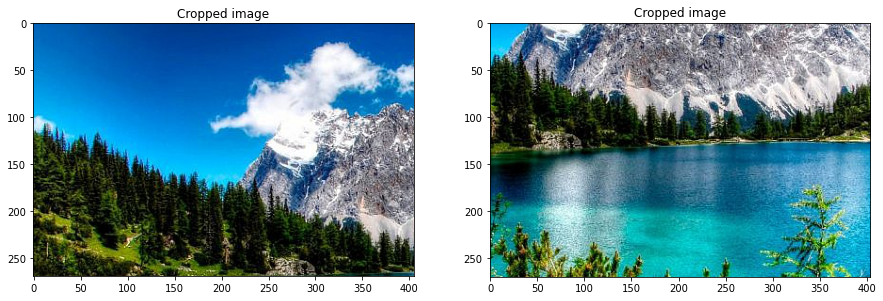

In [154]:
def crop_image(image, hmin, hmax, wmin, wmax):
  cropped_image = image[hmin:hmax, wmin:wmax,:]
  return cropped_image

height = int(image.shape[0])
weight = int(image.shape[1])
image_center = int(image.shape[0]/2), int(image.shape[1]/2)

cropped_image = crop_image(image,0,height//2,0,weight//2)
cropped_image1 = crop_image(image,image_center[0]-height//4,image_center[0]+height//4,image_center[1]-weight//4,image_center[1]+weight//4)

fig, axs = plt.subplots(1,2,figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(cropped_image)
plt.title('Cropped image')

plt.subplot(1,2,2)
plt.imshow(cropped_image1)
plt.title('Cropped image')


plt.show()

## 3.5. Aplicamos una máscara a una imagen

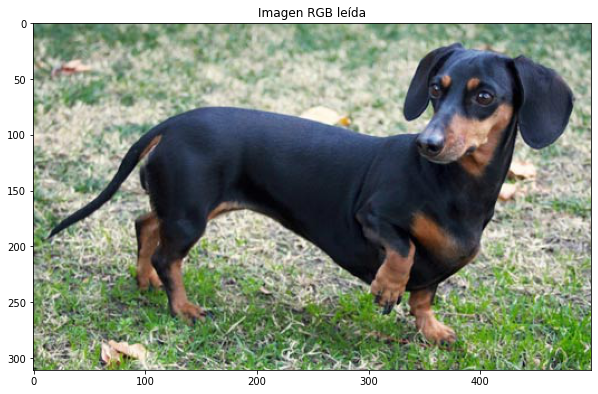

In [155]:
# Aplicaremos una máscara que detecte zonas oscuras, para ello importamos una imagen que permite apreciar el resultado de la máscara
path1 = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP1/perro_salchicha.jpg' #Path en Drive donde se encuentra la imagen
image1 = mpimg.imread(path1) #Leemos la imagen

#Mostramos la imagen
fig, axs = plt.subplots(figsize=(10,10))
axs.imshow(image1)
axs.set_title("Imagen RGB leída")
plt.show() 

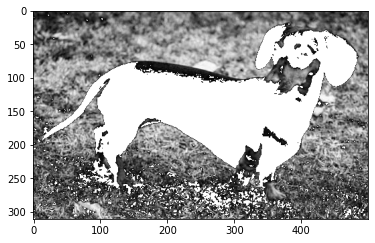

In [161]:
image1_gray = rgb2gray(image1)
mask = image1_gray < 87
image1_gray[mask]=255
plt.imshow(image1_gray, cmap='gray')